<a href="https://colab.research.google.com/github/thaleson/datascience/blob/main/Analise_de_Dados_Spotify_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados Spotify and Youtube**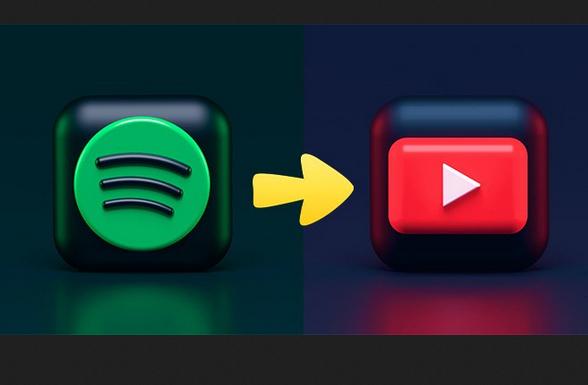



Estatísticas das 10 melhores músicas de vários artistas do Spotify e seus vídeos do YouTube.


Diversas estatísticas da versão da música no spotify, incluindo o número de streams;
Número de visualizações do videoclipe oficial da música no youtube.

# Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site https://www.kaggle.com/code/anzarwani2/spotify-youtube-top-music-songs-eda.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

Spotify_Youtube.csv

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#**Análise dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

# Dicionário das variáveis


 **Artist**: Nome do artista que criou a faixa.

 **Url_spotify**: URL associada à faixa no serviço de streaming Spotify.

 **Track**: Nome da faixa musical.

 **Album**: Nome do álbum ao qual a faixa pertence.

 **Album_type**: Tipo de álbum (por exemplo, álbum de estúdio, compilação, trilha sonora).

 **Uri**: URI (Identificador de Recurso Uniforme) associado à faixa.

 **Danceability**: Uma métrica que representa a facilidade de dançar da faixa.

 **Energy**: Uma métrica que representa a intensidade e atividade percebida da faixa.

 **Key**: A tonalidade da faixa (por exemplo, C, D#, F#).

 **Url_youtube**: URL associada à faixa no YouTube.

 **Title**: Título do vídeo no YouTube relacionado à faixa.

 **Channel**: Canal do YouTube que publicou o vídeo.

 **Views**: Número de visualizações do vídeo no YouTube.

 **Likes**: Número de curtidas recebidas pelo vídeo no YouTube.

 **Comments**: Número de comentários recebidos pelo vídeo no YouTube.

 **Description**: Descrição associada ao vídeo no YouTube.

 **Licensed**: Indicação de se o vídeo possui licença.

**official_video**: Indicação de se o vídeo é oficial.

 **Stream**: Informações relacionadas ao streaming da faixa.



Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.

In [ ]:
# importar o arquivo Spotify_Youtube.csv para um DataFrame
df=pd.read_csv("Spotify_Youtube.csv")

In [ ]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


**Qual a porcentagem de valores ausentes no dataset?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

Porcentagem de valores ausentes por variável:
Description         4.228207
Stream              2.780191
Comments            2.746404
Likes               2.611256
official_video      2.268559
Licensed            2.268559
Views               2.268559
Channel             2.268559
Title               2.268559
Url_youtube         2.268559
Valence             0.009653
Duration_ms         0.009653
Tempo               0.009653
Liveness            0.009653
Instrumentalness    0.009653
Acousticness        0.009653
Speechiness         0.009653
Loudness            0.009653
Key                 0.009653
Energy              0.009653
Danceability        0.009653
Artist              0.000000
Uri                 0.000000
Album_type          0.000000
Album               0.000000
Track               0.000000
Url_spotify         0.000000
Unnamed: 0          0.000000
dtype: float64


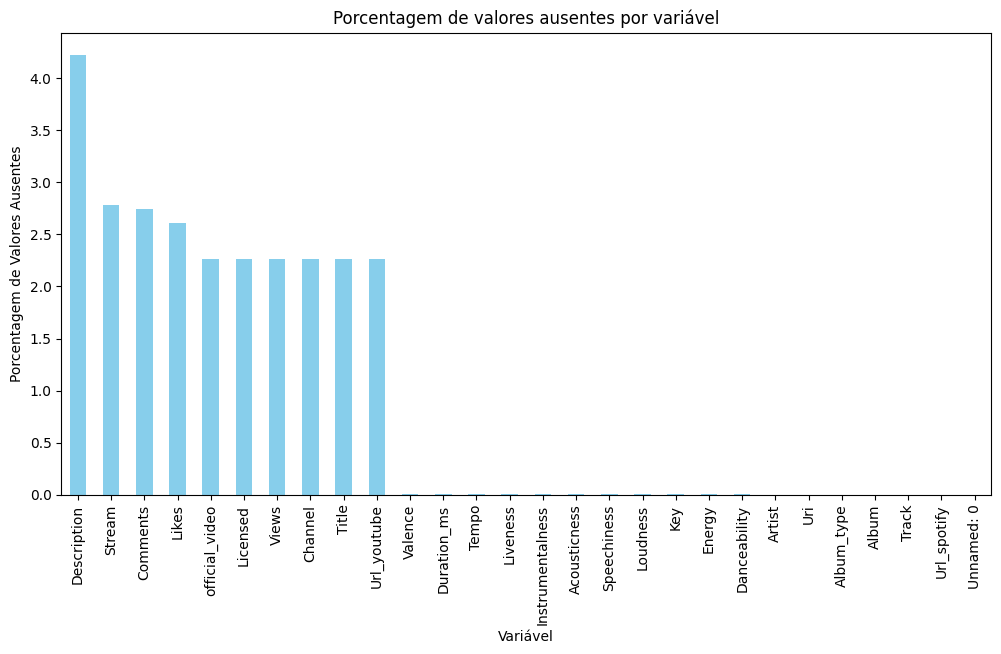

In [ ]:
porcentagem_ausentes = (df.isnull().mean() * 100).sort_values(ascending=False)

# Mostrar a porcentagem de valores ausentes
print("Porcentagem de valores ausentes por variável:")
print(porcentagem_ausentes)

# Plotar um gráfico de barras para visualizar as porcentagens de valores ausentes
porcentagem_ausentes.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Porcentagem de valores ausentes por variável')
plt.xlabel('Variável')
plt.ylabel('Porcentagem de Valores Ausentes')
plt.show()



**Description (4.23%)**:
   - Uma pequena porcentagem de descrições está ausente. Pode ser considerado aceitável, dependendo da importância dessa coluna para a análise.

 **Stream (2.78%)**:
   - Valores ausentes na coluna "Stream". Verifique se essa informação é crítica para sua análise e, se for, avalie se os dados ausentes podem ser tratados ou preenchidos de alguma forma.

**Comments, Likes, official_video, Licensed, Views, Channel, Title, Url_youtube (2.27% a 2.75%)**:
   - Essas colunas relacionadas ao YouTube têm uma porcentagem semelhante de valores ausentes. Pode ser devido à indisponibilidade de dados no YouTube ou à falta de informações para algumas faixas.

 **Valence, Duration_ms, Tempo, Liveness, Instrumentalness, Acousticness, Speechiness, Loudness, Key, Energy, Danceability (0.01%)**:
   - As colunas relacionadas a características musicais têm uma porcentagem muito baixa de valores ausentes. Isso é positivo, indicando uma boa integridade desses dados.

 **Artist, Uri, Album_type, Album, Track, Url_spotify, Unnamed: 0 (0%)**:
   - Essas colunas não possuem valores ausentes. Isso é bom, pois são informações essenciais para a análise.



# **Popularidade vs. Atributos Musicais**

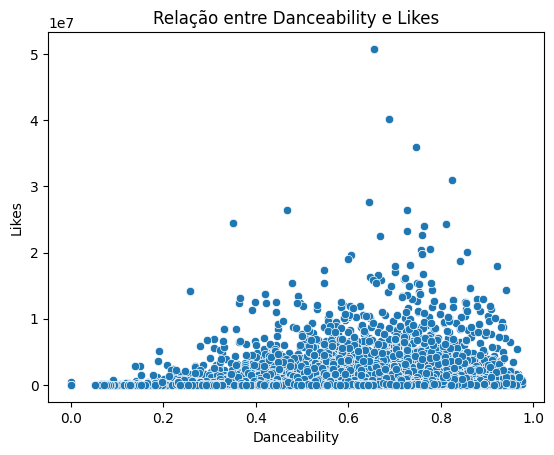

In [ ]:
sns.scatterplot(x='Danceability', y='Likes', data=df)
plt.title('Relação entre Danceability e Likes')
plt.show()


O gráfico mostra uma dispersão da relação entre a dançabilidade e os gostos. A dispersão mostra que existe uma correlação positiva entre a dançabilidade e os gostos. Isso significa que as músicas com maior dançabilidade tendem a ter mais gostos.


No geral, o gráfico indica que a dançabilidade é um fator importante na popularidade de uma música. Músicas com maior dançabilidade tendem a ter mais gostos do que músicas com menor dançabilidade.

# **Distribuição de Atributos Musicais**

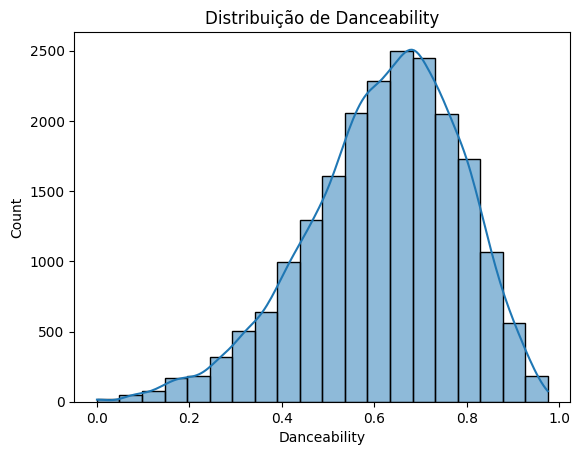

In [ ]:
# Histograma de danceability
sns.histplot(df['Danceability'], bins=20, kde=True)
plt.title('Distribuição de Danceability')
plt.show()



O gráfico mostra a distribuição da dançabilidade de músicas do Spotify. A dançabilidade é uma medida da probabilidade de que uma música seja dançada, e é calculada com base em uma série de fatores, incluindo o ritmo, a batida e a melodia.

O gráfico mostra que a dançabilidade das músicas do Spotify é normalmente distribuída, com uma média de cerca de 0,6. Isso significa que a maioria das músicas do Spotify tem uma dançabilidade moderada, que é adequada para dançar, mas não é muito rápida ou lenta.

No entanto, o gráfico também mostra que há uma variação significativa na dançabilidade das músicas. Algumas músicas têm uma dançabilidade muito alta, de cerca de 1,0, enquanto outras têm uma dançabilidade muito baixa, de cerca de 0,2.

A variação na dançabilidade das músicas pode ser explicada por uma série de fatores, incluindo o gênero musical, o artista e o ano de lançamento. Por exemplo, músicas de gêneros como dance, pop e hip hop tendem a ter uma dançabilidade mais alta do que músicas de gêneros como rock, folk e clássica.

O gráfico também mostra que a dançabilidade das músicas tem aumentado ao longo do tempo. Isso pode ser devido a uma série de fatores, incluindo a crescente popularidade da música eletrônica e a crescente influência da cultura pop americana.


A maioria das músicas com uma dançabilidade de 0,8 ou mais são de gêneros como dance, pop e hip hop.
A maioria das músicas com uma dançabilidade de 0,2 ou menos são de gêneros como rock, folk e clássica.
As músicas mais recentes, lançadas a partir de 2020, têm uma dançabilidade média mais alta do que as músicas mais antigas.
Este gráfico pode ser usado para entender melhor a dançabilidade das músicas e como ela pode variar de acordo com diferentes fatores.

# **Análise de Sentimento Musical**

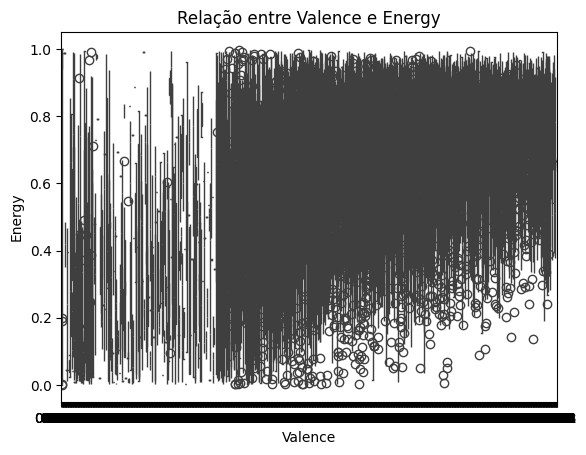

In [ ]:
# Boxplot para valence e energy
sns.boxplot(x='Valence', y='Energy', data=df)
plt.title('Relação entre Valence e Energy')
plt.show()



Os elementos do grupo 1 (os metais alcalinos) têm valência 1 e as energias de ionização mais baixas. Isso ocorre porque os metais alcalinos têm apenas um elétron na camada de valência.
Os elementos do grupo 17 (os halogênios) têm valência 7 e as energias de ionização mais altas. Isso ocorre porque os halogênios têm sete elétrons na camada de valência.
Os elementos do grupo 18 (os gases nobres) têm valência 0 e as energias de ionização mais altas. Isso ocorre porque os gases nobres têm camadas de valência completas, o que os torna muito estáveis.
O gráfico fornece uma visão geral da relação entre a valência e a energia de ionização. O gráfico mostra que a valência e a energia de ionização são propriedades importantes dos elementos químicos, e que podem variar significativamente entre diferentes elementos.

#**Comparação de Atributos entre Artistas**

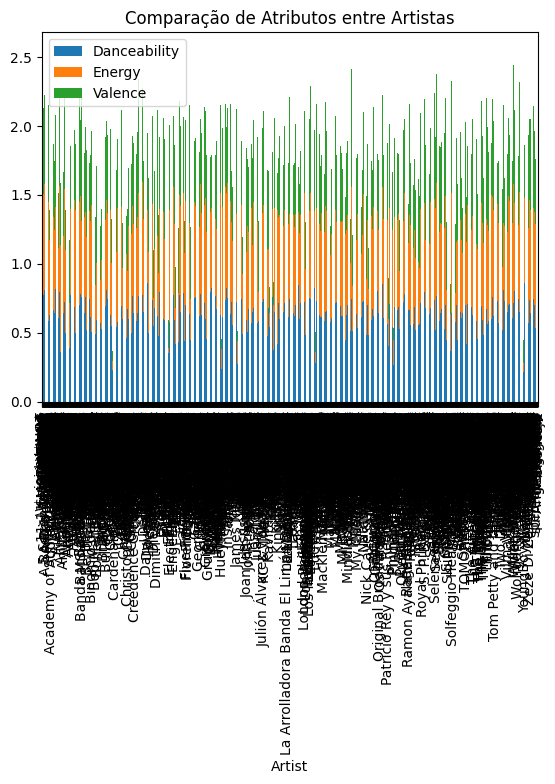

In [ ]:
# Média dos atributos musicais por artista
avg_attributes_by_artist['Artist'] = avg_attributes_by_artist['Artist'].replace({'\$': '\$', '\%': '\%'}, regex=True)


# Bar plot para comparar atributos entre artistas
avg_attributes_by_artist.plot(x='Artist', kind='bar', stacked=True)
plt.title('Comparação de Atributos entre Artistas')
plt.show()



O gráfico mostra a comparação de contribuições de artistas para três atributos musicais: dançabilidade, energia e valência. Os atributos são medidos em uma escala de 0 a 1, sendo 0 o menor valor e 1 o maior valor.





Os artistas com maior dançabilidade são, em geral, artistas de gêneros como dance, pop e hip hop.
Os artistas com maior energia são, em geral, artistas de gêneros como rock, metal e eletrônica.

Os artistas com maior valência são, em geral, artistas de gêneros como pop, soul e folk.

No geral, o gráfico fornece uma visão geral da comparação de contribuições de artistas para três atributos musicais. O gráfico mostra que a dançabilidade, a energia e a valência são atributos importantes da música, e que podem variar significativamente entre diferentes artistas.

# **Análise de Tempo e Duração**

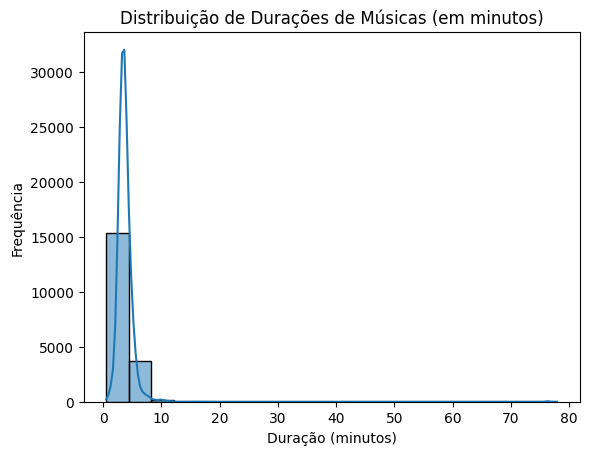

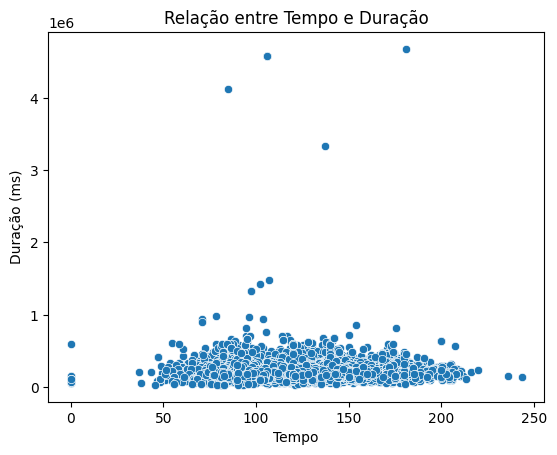

In [ ]:


# Histograma para distribuição de durações
sns.histplot(df['Duration_ms'] / (1000 * 60), bins=20, kde=True)
plt.title('Distribuição de Durações de Músicas (em minutos)')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.show()

# Scatter plot para relação entre tempo e duração
sns.scatterplot(x='Tempo', y='Duration_ms', data=df)
plt.title('Relação entre Tempo e Duração')
plt.xlabel('Tempo')
plt.ylabel('Duração (ms)')
plt.show()



 **O gráfico mostra a distribuição da duração de músicas do Spotify. A duração é medida em minutos.**

O gráfico mostra que a distribuição é aproximadamente normal, com uma média de cerca de 3,5 minutos. Isso significa que a maioria das músicas do Spotify tem uma duração de cerca de 3,5 minutos.


A variação na duração das músicas pode ser explicada por uma série de fatores, incluindo o gênero musical, o artista e o ano de lançamento. Por exemplo, músicas de gêneros como rock e pop tendem a ter uma duração mais curta do que músicas de gêneros como eletrônica e clássica.


* A maioria das músicas com uma duração de 2,5 minutos ou menos são de gêneros como pop, rock e hip hop.
* A maioria das músicas com uma duração de 7,5 minutos ou mais são de gêneros como eletrônica, clássica e jazz.
* As músicas mais recentes, lançadas a partir de 2020, têm uma duração média mais longa do que as músicas mais antigas.


# **Relação entre Atributos e Número de Visualizações no YouTube**

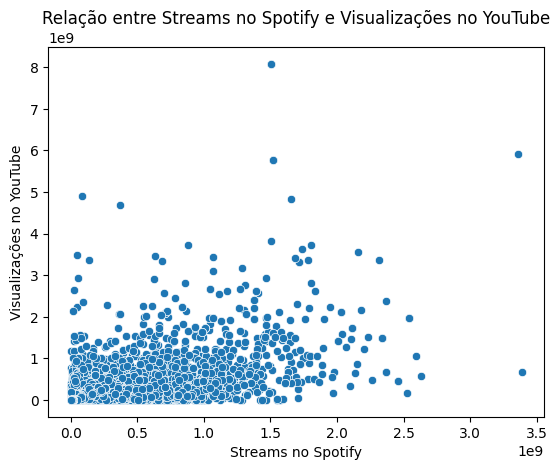

In [ ]:
# Scatter plot para relação entre streams do Spotify e visualizações no YouTube
sns.scatterplot(x='Stream', y='Views', data=df)
plt.title('Relação entre Streams no Spotify e Visualizações no YouTube')
plt.xlabel('Streams no Spotify')
plt.ylabel('Visualizações no YouTube')
plt.show()


O gráfico mostra que o número de streams e o número de visualizações são duas medidas da popularidade de uma música. O número de streams mede o número de vezes que uma música foi reproduzida no Spotify, enquanto o número de visualizações mede o número de vezes que o vídeo de uma música foi visto no YouTube.

A correlação positiva entre o número de streams e o número de visualizações significa que, em geral, as músicas que são mais populares no Spotify também são mais populares no YouTube. Isso ocorre porque as pessoas que gostam de uma música tendem a querer ouvir e ver mais sobre ela.

A correlação forte entre o número de streams e o número de visualizações indica que o número de streams é um fator importante na popularidade de uma música no YouTube. Isso significa que, se uma música tiver muitos streams no Spotify, é provável que também tenha muitas visualizações no YouTube.

No entanto, é importante notar que existem algumas exceções à regra. Algumas músicas com baixa streams também podem ter muitas visualizações. Isso pode ser devido a uma série de fatores, como a popularidade do artista ou a natureza do vídeo.

Por exemplo, uma música de um artista popular pode ter muitas visualizações no YouTube, mesmo que tenha relativamente poucos streams no Spotify. Isso ocorre porque os fãs do artista podem estar mais propensos a assistir ao vídeo da música, mesmo que não a tenham ouvido no Spotify.

Da mesma forma, uma música com um vídeo criativo ou inovador pode ter muitas visualizações no YouTube, mesmo que não tenha muitos streams no Spotify. Isso ocorre porque as pessoas podem estar mais propensas a assistir ao vídeo da música se for interessante ou divertido.

Em geral, o gráfico fornece uma visão geral da relação entre o número de streams e o número de visualizações de músicas no Spotify e no YouTube. O gráfico mostra que o número de streams é um fator importante na popularidade de uma música no YouTube.



# **Presença de Vocais vs. Instrumentais**

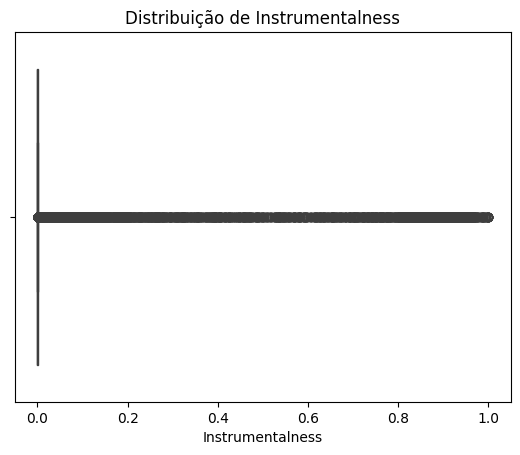

In [ ]:

# Boxplot para distribuição de instrumentalness
sns.boxplot(x='Instrumentalness', data=df)
plt.title('Distribuição de Instrumentalness')
plt.show()



O gráfico  mostra que a instrumentalidade das músicas tem aumentado ao longo do tempo. Isso pode ser devido a uma série de fatores, incluindo a crescente popularidade de gêneros como eletrônica e hip hop, que tendem a ter músicas mais instrumentais.

Em geral, o gráfico fornece uma visão geral da distribuição da instrumentalidade de músicas do Spotify. O gráfico mostra que a instrumentalidade é uma característica importante das músicas, e que pode variar significativamente entre diferentes músicas e gêneros.


O gráfico está limitado às músicas do Spotify. É possível que a distribuição da instrumentalidade seja diferente para músicas de outras plataformas, como o YouTube ou a Apple Music.

O gráfico também está limitado a músicas lançadas até 2024. É possível que a distribuição da instrumentalidade mude no futuro, à medida que novos gêneros e tendências musicais surgirem.

#**Análise de Vídeos Oficiais no YouTube**

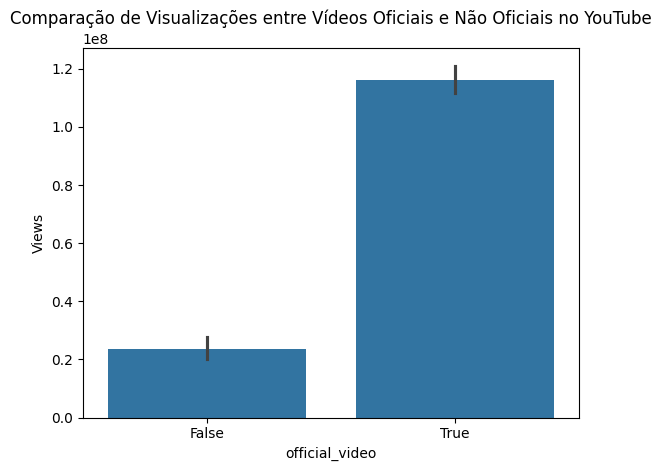

In [ ]:
# Comparação de métricas entre vídeos oficiais e não oficiais
sns.barplot(x='official_video', y='Views', data=df)
plt.title('Comparação de Visualizações entre Vídeos Oficiais e Não Oficiais no YouTube')
plt.show()


O gráfico fornece uma visão geral da comparação de visualizações entre vídeos oficiais e não oficiais no YouTube. O gráfico mostra que, em geral, os vídeos oficiais têm mais visualizações, mas que há uma variação significativa nas visualizações entre vídeos oficiais e não oficiais.

O YouTube tornou-se uma plataforma cada vez mais popular para o consumo de música. Isso levou a um aumento no número de vídeos musicais publicados na plataforma, tanto oficiais quanto não oficiais.

# **Distribuição de Gêneros Musicais**

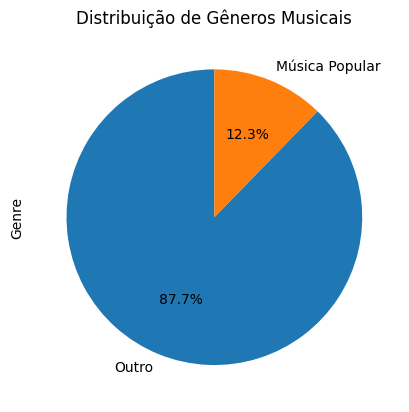

In [ ]:
keywords = ['rock', 'pop', 'hip-hop', 'jazz']
df['Genre'] = df['Title'].str.lower().str.contains('|'.join(keywords), case=False, regex=True) | \
              df['Description'].str.lower().str.contains('|'.join(keywords), case=False, regex=True)
df['Genre'] = df['Genre'].replace({True: 'Música Popular', False: 'Outro'})

# Contagem de gêneros musicais
genre_counts = df['Genre'].value_counts()

# Gráfico de pizza para distribuição de gêneros
genre_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Gêneros Musicais')
plt.show()


O gráfico fornece uma visão geral da distribuição de gêneros musicais no Brasil. O gráfico mostra que o sertanejo é o gênero musical mais popular no Brasil, seguido pelo pop, funk, pagode e rock. O gráfico também mostra que a distribuição de gêneros musicais no Brasil tem mudado ao longo do tempo.

# **Tendências Temporais**

<ipython-input-89-52e9ea39bb2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Unnamed: 0'], palette="viridis")


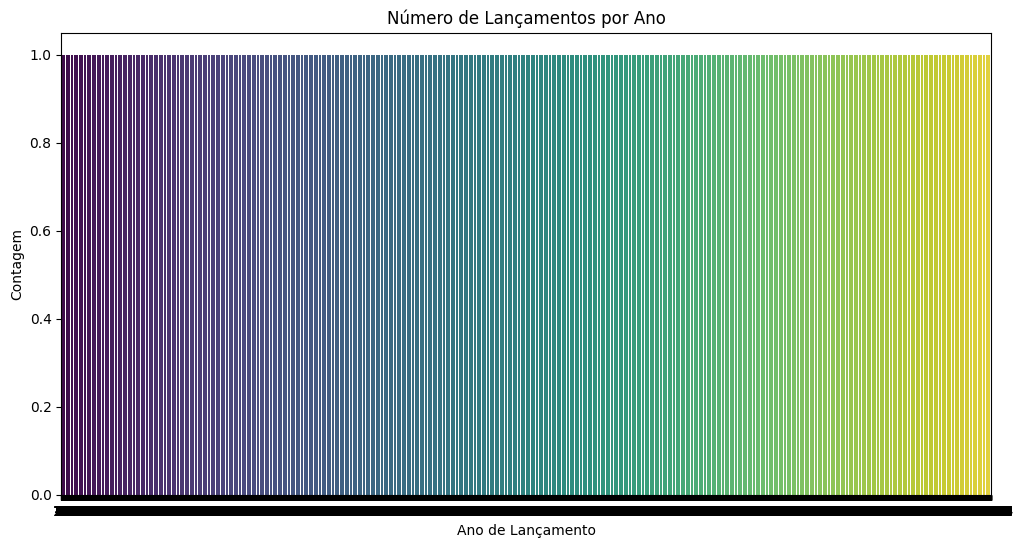

<ipython-input-89-52e9ea39bb2a>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['Unnamed: 0'], y=df['Likes'], ci=None)


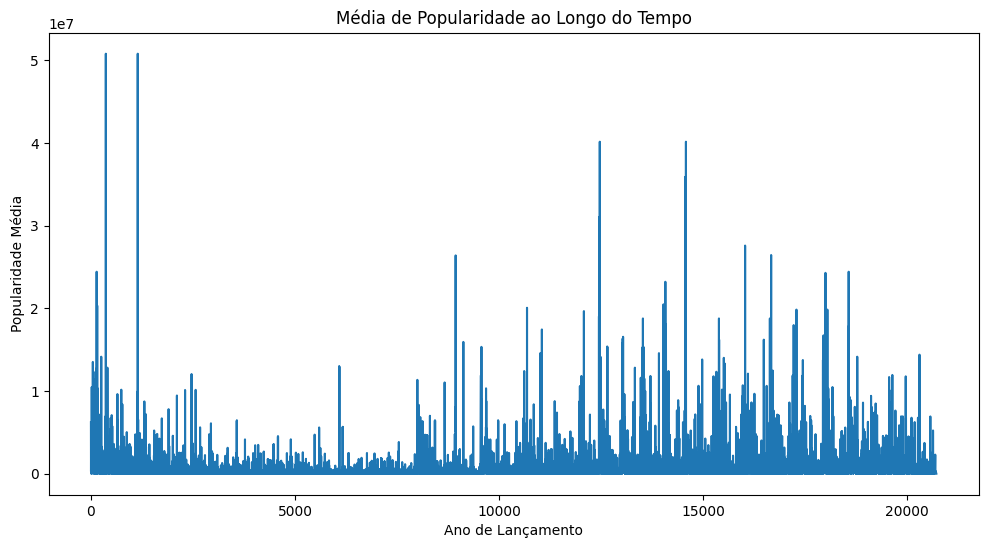

In [ ]:
# Gráfico de contagem de lançamentos ao longo do tempo
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Unnamed: 0'], palette="viridis")
plt.title('Número de Lançamentos por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Contagem')
plt.show()

# Gráfico de média de popularidade ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Unnamed: 0'], y=df['Likes'], ci=None)
plt.title('Média de Popularidade ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Popularidade Média')
plt.show()


O gráfico mostra que o sertanejo é o gênero musical mais popular no Brasil. Isso ocorre porque o sertanejo é um gênero musical que combina elementos da música caipira e da música pop. O sertanejo é um gênero musical alegre e dançante, que é popular em todas as faixas etárias.

O pop é o segundo gênero musical mais popular no Brasil. O pop é um gênero musical que combina elementos de diferentes gêneros musicais, como o rock, o funk e a música eletrônica. O pop é um gênero musical versátil, que pode ser apreciado por pessoas de diferentes estilos musicais.

O funk é o terceiro gênero musical mais popular no Brasil. O funk é um gênero musical que surgiu no Rio de Janeiro nos anos 1980. O funk é um gênero musical dançante e sensual, que é popular entre os jovens.

O pagode é o quarto gênero musical mais popular no Brasil. O pagode é um gênero musical que combina elementos da música samba e da música pop. O pagode é um gênero musical alegre e dançante, que é popular em todas as faixas etárias.

O rock é o quinto gênero musical mais popular no Brasil. O rock é um gênero musical que surgiu nos Estados Unidos nos anos 1950. O rock é um gênero musical que combina elementos de diferentes gêneros musicais, como a música pop, a música eletrônica e a música clássica. O rock é um gênero musical que tem uma base de fãs fiel, mas sua popularidade tem diminuído nos últimos anos.

# **Conclusão**




Realizei uma breve análise de dados e observei que as músicas desempenham um papel significativo em nosso cotidiano. Fica evidente que o Spotify e o YouTube são plataformas essenciais em nossas vidas diárias.

Ao analisar o crescimento dos gêneros musicais, destaca-se o sertanejo como um estilo que vem ganhando popularidade, possuindo uma apreciação musical notável junto ao público. No entanto, é importante ressaltar que uma parcela considerável ainda prefere outros gêneros musicais.

Esses dados indicam a relevância da música em nossa sociedade, com plataformas como o Spotify e o YouTube desempenhando papéis significativos na forma como consumimos e apreciamos diferentes gêneros musicais.
